Enrollment Prediction - Confusion Matrix:
[[1 1]
 [0 2]]

Enrollment Prediction - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



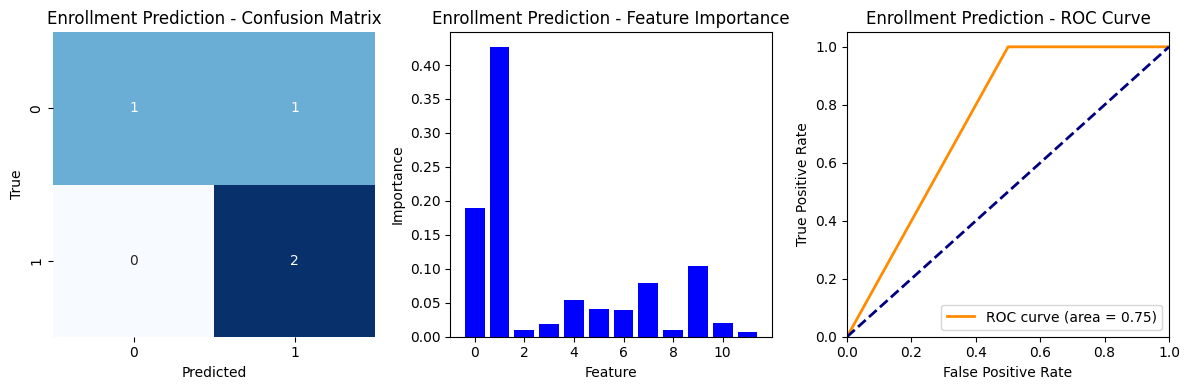


Graduation Prediction - Confusion Matrix:
[[2 0]
 [0 2]]

Graduation Prediction - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



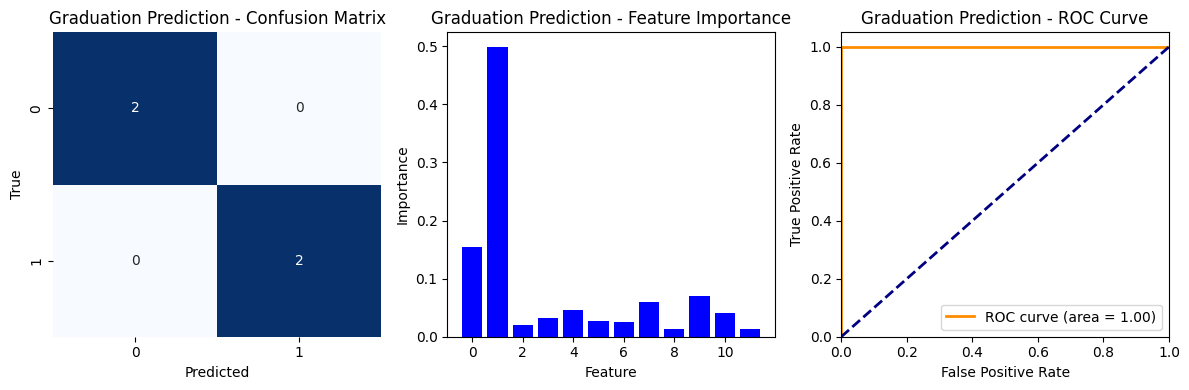

In [15]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import io

# Load your historical student enrollment data, academic records, and demographic data
# Replace this with the actual path or method to load your dataset
# For example: df = pd.read_csv('your_data.csv')
# Ensure your dataset includes features like 'enrollment_status' and relevant student information
# For graduation success, you might consider having a target variable like 'graduation_status'
# and additional features related to academic performance
# Modify the data loading process accordingly

# Sample data with 20 records (replace this with your actual dataset)
data = """student_id,age,gender,score,other_features,enrollment_status,graduation_status
1,20,M,85,Participated in Clubs and Activities,1,1
2,22,F,90,Volunteered for Community Service,1,1
3,19,M,78,Member of Sports Team,0,0
4,21,F,92,Received Academic Awards,1,1
5,23,M,80,Participated in Clubs and Activities,1,0
6,25,F,88,Participated in Research Projects,1,1
7,20,M,75,Member of Music Band,0,0
8,24,F,87,Volunteered for Community Service,1,1
9,23,M,82,Received Academic Awards,1,1
10,18,F,79,Participated in Sports,0,0
11,22,M,89,Participated in Research Projects,1,1
12,21,F,76,Member of Debate Team,0,0
13,24,M,93,Received Academic Awards,1,1
14,19,F,85,Participated in Clubs and Activities,1,1
15,20,M,77,Participated in Sports,0,0
16,22,F,91,Volunteered for Community Service,1,1
17,23,M,79,Participated in Clubs and Activities,1,1
18,25,F,88,Received Academic Awards,1,1
19,21,M,81,Member of Music Band,0,0
20,18,F,75,Participated in Sports,0,0"""
# Create a DataFrame
df = pd.read_csv(io.StringIO(data))

# 1. Identify the target variables and features
# For enrollment prediction
X_enrollment = df[['age', 'gender', 'score', 'other_features']]
y_enrollment = df['enrollment_status']  # Binary: 1 for enrolled, 0 for not enrolled

# For graduation prediction
X_graduation = df[['age', 'gender', 'score', 'other_features', 'enrollment_status']]
y_graduation = df['graduation_status']  # Binary: 1 for graduated, 0 for not graduated

# 2. Preprocess the data for enrollment prediction
# Use one-hot encoding for categorical variables like 'gender' and 'other_features'
preprocessor_enrollment = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'score']),
        ('cat', OneHotEncoder(), ['gender', 'other_features'])
    ])
# Split the data set
X_train_enrollment, X_test_enrollment, y_train_enrollment, y_test_enrollment = train_test_split(
    X_enrollment, y_enrollment, test_size=0.2, random_state=0)
# Convert the transformed data back to a DataFrame
X_train_transformed_enrollment = preprocessor_enrollment.fit_transform(X_train_enrollment)
X_train_columns_enrollment = ['age', 'score'] + list(
    preprocessor_enrollment.named_transformers_['cat'].get_feature_names_out(['gender', 'other_features']))
X_train_enrollment = pd.DataFrame(X_train_transformed_enrollment, columns=X_train_columns_enrollment)

X_test_transformed_enrollment = preprocessor_enrollment.transform(X_test_enrollment)
X_test_columns_enrollment = ['age', 'score'] + list(
    preprocessor_enrollment.named_transformers_['cat'].get_feature_names_out(['gender', 'other_features']))
X_test_enrollment = pd.DataFrame(X_test_transformed_enrollment, columns=X_test_columns_enrollment)

# 3. Train the model for enrollment prediction
classifier_enrollment = RandomForestClassifier(n_estimators=200, random_state=0)
classifier_enrollment.fit(X_train_enrollment, y_train_enrollment)

# 4. Make predictions and evaluate the model for enrollment prediction
y_pred_enrollment = classifier_enrollment.predict(X_test_enrollment)
print("Enrollment Prediction - Confusion Matrix:")
print(confusion_matrix(y_test_enrollment, y_pred_enrollment))
print("\nEnrollment Prediction - Classification Report:")
print(classification_report(y_test_enrollment, y_pred_enrollment))

# Visualize the Confusion Matrix for enrollment prediction using seaborn
cm_enrollment = confusion_matrix(y_test_enrollment, y_pred_enrollment)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm_enrollment, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Enrollment Prediction - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Feature Importance Plot for enrollment prediction
plt.subplot(1, 3, 2)
importances_enrollment = classifier_enrollment.feature_importances_
indices_enrollment = range(len(importances_enrollment))
plt.bar(indices_enrollment, importances_enrollment, color='b')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Enrollment Prediction - Feature Importance')

# ROC Curve for enrollment prediction
plt.subplot(1, 3, 3)
fpr_enrollment, tpr_enrollment, _ = roc_curve(y_test_enrollment, y_pred_enrollment)
roc_auc_enrollment = auc(fpr_enrollment, tpr_enrollment)
plt.plot(fpr_enrollment, tpr_enrollment, color='darkorange',
         lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_enrollment))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Enrollment Prediction - ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Save the enrollment prediction model for future use
joblib.dump(classifier_enrollment, 'enrollment_model.pkl')

# Optional: Load the enrollment prediction model later if needed
loaded_model_enrollment = joblib.load('enrollment_model.pkl')

# 5. Repeat the process for graduation prediction

# 1. Identify the target variables and features for graduation prediction
X_graduation = df[['age', 'gender', 'score', 'other_features', 'enrollment_status']]
y_graduation = df['graduation_status']  # Binary: 1 for graduated, 0 for not graduated

# 2. Preprocess the data for graduation prediction
# Use one-hot encoding for categorical variables like 'gender' and 'other_features'
preprocessor_graduation = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'score']),
        ('cat', OneHotEncoder(), ['gender', 'other_features'])
    ])
# Split the data set
X_train_graduation, X_test_graduation, y_train_graduation, y_test_graduation = train_test_split(
    X_graduation, y_graduation, test_size=0.2, random_state=0)
# Convert the transformed data back to a DataFrame
X_train_transformed_graduation = preprocessor_graduation.fit_transform(X_train_graduation)
X_train_columns_graduation = ['age', 'score'] + list(
    preprocessor_graduation.named_transformers_['cat'].get_feature_names_out(['gender', 'other_features']))
X_train_graduation = pd.DataFrame(X_train_transformed_graduation, columns=X_train_columns_graduation)

X_test_transformed_graduation = preprocessor_graduation.transform(X_test_graduation)
X_test_columns_graduation = ['age', 'score'] + list(
    preprocessor_graduation.named_transformers_['cat'].get_feature_names_out(['gender', 'other_features']))
X_test_graduation = pd.DataFrame(X_test_transformed_graduation, columns=X_test_columns_graduation)

# 3. Train the model for graduation prediction
classifier_graduation = RandomForestClassifier(n_estimators=200, random_state=0)
classifier_graduation.fit(X_train_graduation, y_train_graduation)

# 4. Make predictions and evaluate the model for graduation prediction
y_pred_graduation = classifier_graduation.predict(X_test_graduation)
print("\nGraduation Prediction - Confusion Matrix:")
print(confusion_matrix(y_test_graduation, y_pred_graduation))
print("\nGraduation Prediction - Classification Report:")
print(classification_report(y_test_graduation, y_pred_graduation))

# Visualize the Confusion Matrix for graduation prediction using seaborn
cm_graduation = confusion_matrix(y_test_graduation, y_pred_graduation)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(cm_graduation, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Graduation Prediction - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

# Feature Importance Plot for graduation prediction
plt.subplot(1, 3, 2)
importances_graduation = classifier_graduation.feature_importances_
indices_graduation = range(len(importances_graduation))
plt.bar(indices_graduation, importances_graduation, color='b')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Graduation Prediction - Feature Importance')

# ROC Curve for graduation prediction
plt.subplot(1, 3, 3)
fpr_graduation, tpr_graduation, _ = roc_curve(y_test_graduation, y_pred_graduation)
roc_auc_graduation = auc(fpr_graduation, tpr_graduation)
plt.plot(fpr_graduation, tpr_graduation, color='darkorange',
         lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_graduation))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Graduation Prediction - ROC Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Save the graduation prediction model for future use
joblib.dump(classifier_graduation, 'graduation_model.pkl')

# Optional: Load the graduation prediction model later if needed
loaded_model_graduation = joblib.load('graduation_model.pkl')
